In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import keras 
from keras.models import Sequential
from keras.layers import Dense 
import tensorflow
#from tensorflow.keras.utils import to_categorical
from keras import layers
#from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K
from keras.utils import np_utils

from tensorflow.keras.models import load_model

In [2]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 4051-E7E7

 Directory of C:\Users\Nikhiel\Desktop\model_analysis

2023/01/19  12:06    <DIR>          .
2023/01/19  09:24    <DIR>          ..
2023/01/19  12:01    <DIR>          .ipynb_checkpoints
2022/12/13  08:10    <DIR>          __pycache__
2022/11/28  10:04         1ÿ459ÿ166 Analysis_of_nets(1)_updated.html
2022/11/28  21:35           800ÿ771 Analysis_of_nets.ipynb
2023/01/19  12:06           754ÿ549 Analysis_of_nets-UNORM_CNN.ipynb
2022/11/28  02:11           161ÿ352 ann1.h5
2022/11/06  00:42             2ÿ899 avgph.py
2022/12/14  10:42           758ÿ157 Clean_simsigs_eap20.csv
2022/12/14  11:02           851ÿ214 Clean_simsigs_eap40.csv
2022/12/14  11:33           876ÿ566 Clean_simsigs_eap80.csv
2022/12/11  13:24            54ÿ422 Clean_xe1000.csv
2022/12/13  13:46           248ÿ472 Clean_xe1400.csv
2022/12/11  13:24           469ÿ330 Clean_xe2000.csv
2022/12/13  13:47           620ÿ215 Clean_xe2400.csv
2022/12/13  13:47    

In [3]:
test = pd.read_csv("test.csv")

In [4]:
signals = np.array(test.iloc[:, :90]).reshape(len(test), 3, 30)
labels = np.array(test.label)

In [5]:
sigs_flat = np.array(test.iloc[:, :90])

In [6]:
labels_ohe = keras.utils.np_utils.to_categorical(labels, 2)

In [7]:
labels

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [8]:
labels_ohe

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [9]:
## Normalize the signals 
sigs_norm = signals

sigs_flat_norm = sigs_flat

## Load the keras models 

In [10]:
cnn1 = load_model('unorm_cnn_NET1.h5')
#cnn2 = load_model('cnn2_NET1.h5')
ann1 = load_model('unorm_ann1.h5')

### cnn1 summary 

In [11]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convol2D (Conv2D)           (None, 3, 30, 120)        1200      
                                                                 
 maxpool (MaxPooling2D)      (None, 1, 10, 120)        0         
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dropout (Dropout)           (None, 1200)              0         
                                                                 
 Dense-output (Dense)        (None, 2)                 2402      
                                                                 
Total params: 3,602
Trainable params: 3,602
Non-trainable params: 0
_________________________________________________________________


### cnn2 summary

In [12]:
#cnn2.summary()

### ann1 summary

In [13]:
ann1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               9100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 Dense-output (Dense)        (None, 2)                 202       
                                                                 
Total params: 9,302
Trainable params: 9,302
Non-trainable params: 0
_________________________________________________________________


## Predict on the test data using our models !

In [14]:
# compute the probabilities 
probs_cnn1 = cnn1.predict(sigs_norm)
#probs_cnn2 = cnn2.predict(sigs_norm)

probs_ann1 = ann1.predict(sigs_flat_norm)

### Get the corresponding predictions !

In [15]:
preds_cnn1 = np.argmax(probs_cnn1, axis=1)
#preds_cnn2 = np.argmax(probs_cnn2, axis=1)

preds_ann1 = np.argmax(probs_ann1, axis=1)

#  Confusion Matrix 

In [16]:
from sklearn import metrics

### cnn1

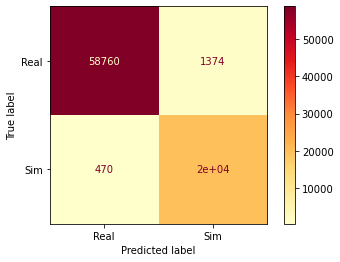

In [17]:
confusion_mat_cnn1 = metrics.confusion_matrix(labels, preds_cnn1, labels=[0, 1])
cm_display_cnn1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat_cnn1, display_labels = ["Real", "Sim"])

cm_display_cnn1.plot(cmap='YlOrRd')
plt.show()

In [18]:
Precision_cnn1 = metrics.precision_score(labels, preds_cnn1, pos_label=1)
Sensitivity_recall_cnn1 = metrics.recall_score(labels, preds_cnn1, pos_label=1)
Specificity_cnn1 = metrics.recall_score(labels, preds_cnn1, pos_label=1)
F1_score_cnn1 = metrics.f1_score(labels, preds_cnn1, pos_label=1)
Accuracy_cnn1 = metrics.accuracy_score(labels, preds_cnn1)

print("Precision = {}".format(Precision_cnn1))
print("Recall = {}".format(Sensitivity_recall_cnn1))
print("Spec = {}".format(Specificity_cnn1))
print("f1 = {}".format(F1_score_cnn1))
print("Accuracy = {}".format(Accuracy_cnn1))

Precision = 0.9346896092784486
Recall = 0.9766564021058906
Spec = 0.9766564021058906
f1 = 0.9552122801904206
Accuracy = 0.977026959685055


### cnn2

In [19]:
#confusion_mat_cnn2 = metrics.confusion_matrix(labels, preds_cnn2, labels=[0, 1])
#cm_display_cnn2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat_cnn2, display_labels = ["Real", "Sim"])

#cm_display_cnn2.plot(cmap='YlOrRd')
#plt.show()

In [20]:
#Precision_cnn2 = metrics.precision_score(labels, preds_cnn2, pos_label=1)
#Sensitivity_recall_cnn2 = metrics.recall_score(labels, preds_cnn2, pos_label=1)
#Specificity_cnn2 = metrics.recall_score(labels, preds_cnn2, pos_label=1)
#F1_score_cnn2 = metrics.f1_score(labels, preds_cnn2, pos_label=1)
#Accuracy_cnn2 = metrics.accuracy_score(labels, preds_cnn2)

#print("Precision = {}".format(Precision_cnn2))
#print("Recall = {}".format(Sensitivity_recall_cnn2))
#print("Spec = {}".format(Specificity_cnn2))
#print("f1 = {}".format(F1_score_cnn2))
#print("Accuracy = {}".format(Accuracy_cnn2))

### ann1

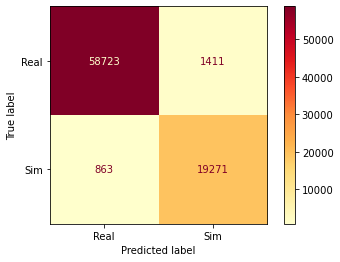

In [21]:
confusion_mat_ann1 = metrics.confusion_matrix(labels, preds_ann1, labels=[0, 1])
cm_display_ann1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat_ann1, display_labels = ["Real", "Sim"])

cm_display_ann1.plot(cmap='YlOrRd')
plt.show()

In [22]:
Precision_ann1 = metrics.precision_score(labels, preds_ann1, pos_label=1)
Sensitivity_recall_ann1 = metrics.recall_score(labels, preds_ann1, pos_label=1)
Specificity_ann1 = metrics.recall_score(labels, preds_ann1, pos_label=1)
F1_score_ann1 = metrics.f1_score(labels, preds_ann1, pos_label=1)
Accuracy_ann1 = metrics.accuracy_score(labels, preds_ann1)

print("Precision = {}".format(Precision_ann1))
print("Recall = {}".format(Sensitivity_recall_ann1))
print("Spec = {}".format(Specificity_ann1))
print("f1 = {}".format(F1_score_ann1))
print("Accuracy = {}".format(Accuracy_ann1))

Precision = 0.9317764239435258
Recall = 0.9571371808880501
Spec = 0.9571371808880501
f1 = 0.9442865542924344
Accuracy = 0.971669905815518


# Precision Recall Curves 

In [23]:
from sklearn.metrics import precision_recall_curve, auc

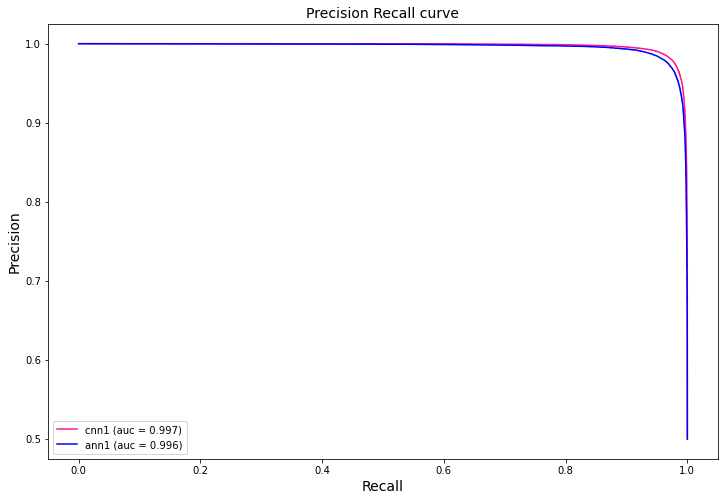

In [24]:
prec_cnn1, rec_cnn1, thres_cnn1 = precision_recall_curve(labels_ohe.ravel(), probs_cnn1.ravel())
pr_auc_cnn1=auc(rec_cnn1, prec_cnn1)

#prec_cnn2, rec_cnn2, thres_cnn2 = precision_recall_curve(labels_ohe.ravel(), probs_cnn2.ravel())
#pr_auc_cnn2=auc(rec_cnn2, prec_cnn2)

prec_ann1, rec_ann1, thres_ann1 = precision_recall_curve(labels_ohe.ravel(), probs_ann1.ravel())
pr_auc_ann1=auc(rec_ann1, prec_ann1)






plt.figure(figsize=(12, 8))
plt.plot(rec_cnn1, prec_cnn1, label='cnn1 (auc = {:.3f})'.format(pr_auc_cnn1), color='deeppink')
#plt.plot(rec_cnn2, prec_cnn2, label='cnn2 (auc = {:.3f})'.format(pr_auc_cnn2), color='red')
plt.plot(rec_ann1, prec_ann1, label='ann1 (auc = {:.3f})'.format(pr_auc_ann1), color='blue')

#plt.axhline(0.25, color='red', linestyle='--')
plt.title("Precision Recall curve",fontsize=14)
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.legend()
plt.show()

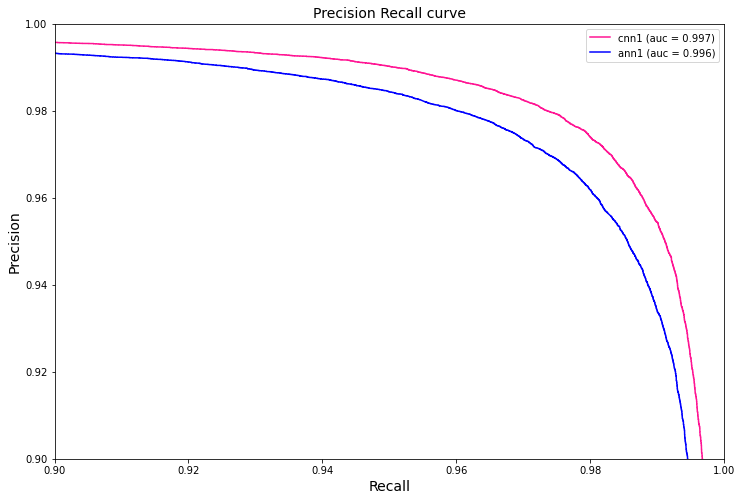

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(rec_cnn1, prec_cnn1, label='cnn1 (auc = {:.3f})'.format(pr_auc_cnn1), color='deeppink')
#plt.plot(rec_cnn2, prec_cnn2, label='cnn2 (auc = {:.3f})'.format(pr_auc_cnn2), color='red')
plt.plot(rec_ann1, prec_ann1, label='ann1 (auc = {:.3f})'.format(pr_auc_ann1), color='blue')

#plt.axhline(0.25, color='red', linestyle='--')
plt.title("Precision Recall curve", fontsize=14)
plt.xlabel("Recall",fontsize=14)
plt.ylabel("Precision",fontsize=14)
plt.xlim(0.9, 1)
plt.ylim(0.9, 1)
plt.legend()
plt.show()

In [83]:
prec_cnn1[-5:-1]

array([0.99994473, 0.99994256, 0.9999387 , 0.99992927])

In [74]:
print(len(prec_cnn1), len(rec_cnn1), len(thres_cnn1))

98349 98349 98348


In [85]:
cnn_PR_df = pd.DataFrame({"Precision":list(prec_cnn1),"Recall":list(rec_cnn1), "threshold":list(thres_cnn1)}, index=)
cnn_PR_df

ValueError: All arrays must be of the same length

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=)


## Lets investigate what was incorrectly classified !

In [26]:
import seaborn as sns

#### cnn1 

In [27]:
miscnn1 = np.where(labels!=preds_cnn1)
miscnn1_probs = probs_cnn1[miscnn1]

In [28]:
miscnn1[0][:7]

array([  9,  22,  40,  52,  61,  86, 130], dtype=int64)

In [29]:
preds_cnn1[52]

1

In [30]:
labels[52]

0

In [31]:
#labels[labels[miscnn1[0]==1]

In [32]:
np.round(probs_cnn1[52], 3)

array([0.22, 0.78], dtype=float32)

In [33]:
def single_ph(sigarray):
    #num_sigs = len(sigarray) for this function it will be one - single signal 
    adc = np.sum(sigarray, axis=0)
    timebin = np.arange(0,30,1)
    '''
    for i in range(30):
        
        avg = np.concatenate((np.array(sigarray[i]),
                             np.array(sigarray[i+30]),
                             np.array(sigarray[i+60])), axis=None).sum()/1
        m_adc.append(avg)
        timebin.append(i)
    '''
    #fig, ax = plt.subplots(figsize=(16, 7))
    #plt.figure(figsize=(16, 7))
    #plt.plot(timebin, m_adc, color="royalblue")
    #plt.scatter(timebin, m_adc, color="navy")
    plt.step(timebin, adc, color='royalblue')
    plt.ylabel("ADC", fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

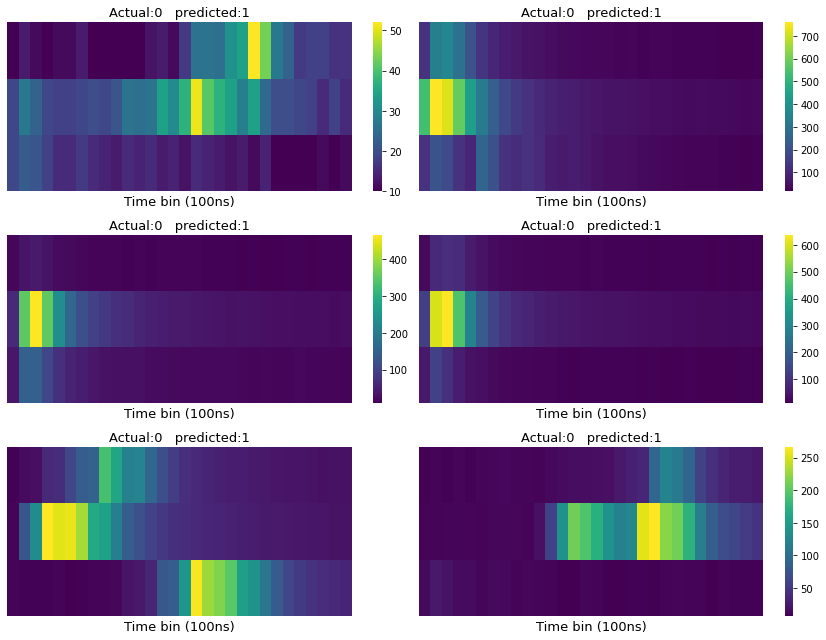

In [34]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[miscnn1[0][j]], preds_cnn1[miscnn1[0][j]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()
    #plt.show()

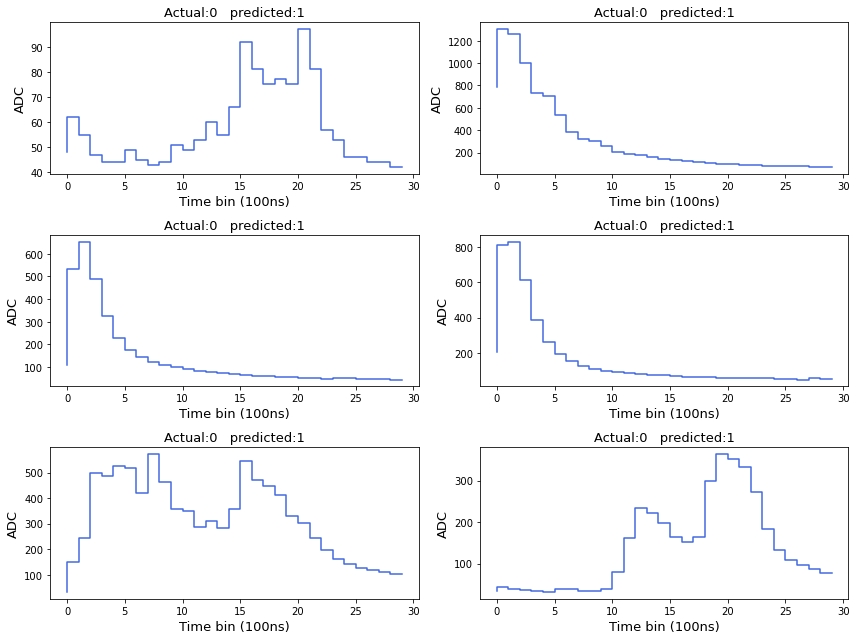

In [35]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[miscnn1[0][j]])
    plt.title("Actual:{}   predicted:{}".format(labels[miscnn1[0][j]], preds_cnn1[miscnn1[0][j]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

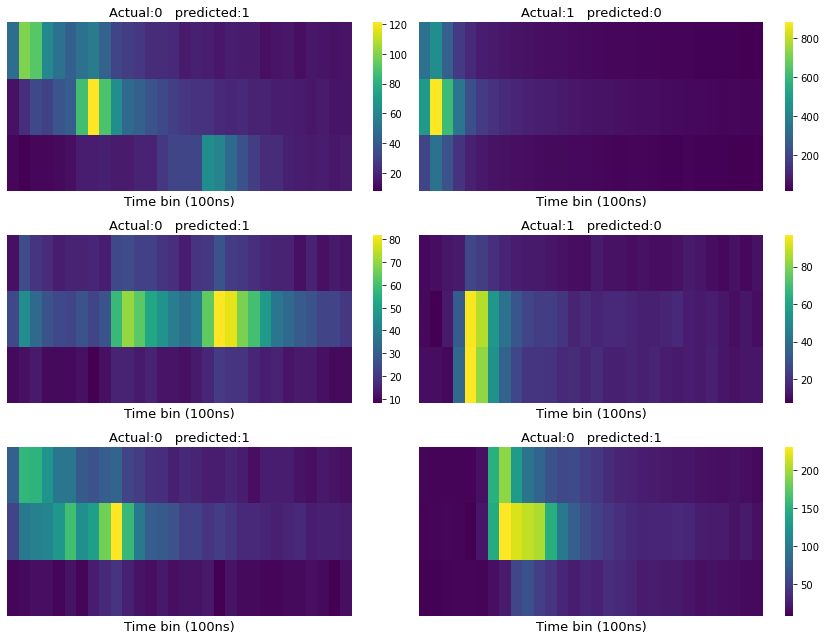

In [36]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[miscnn1[0][j+6]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[miscnn1[0][j+6]], preds_cnn1[miscnn1[0][j+6]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()
    #plt.show()

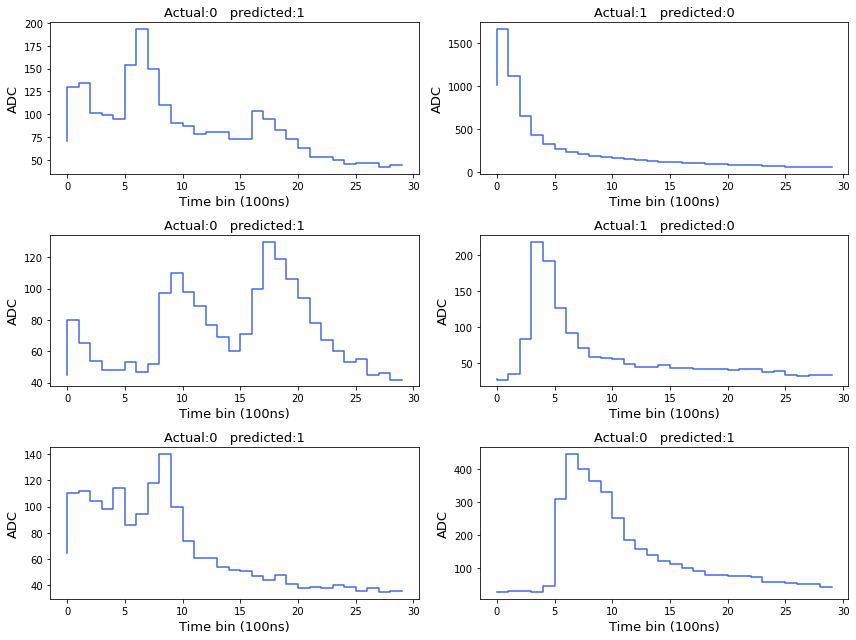

In [37]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[miscnn1[0][j+6]])
    plt.title("Actual:{}   predicted:{}".format(labels[miscnn1[0][j+6]], preds_cnn1[miscnn1[0][j+6]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

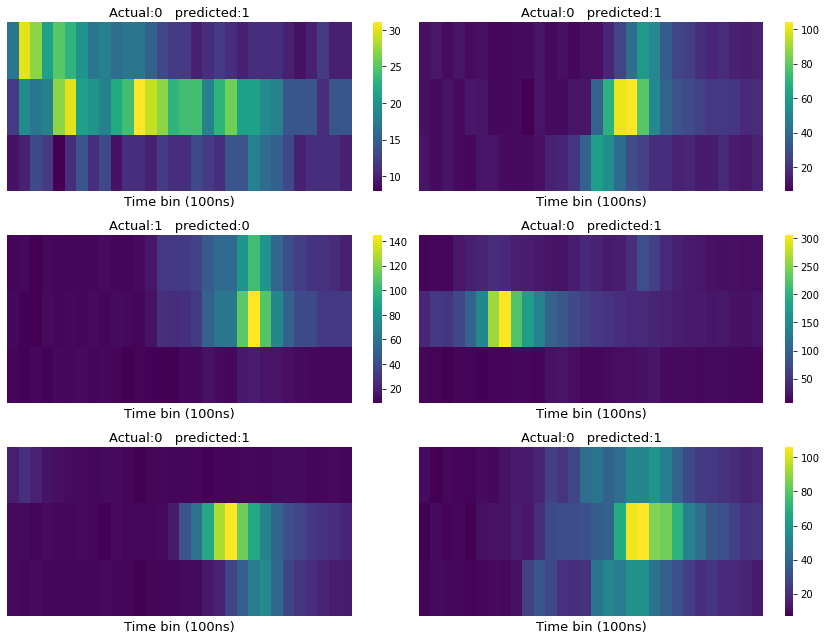

In [38]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[miscnn1[0][j+12]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[miscnn1[0][j+12]], preds_cnn1[miscnn1[0][j+12]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

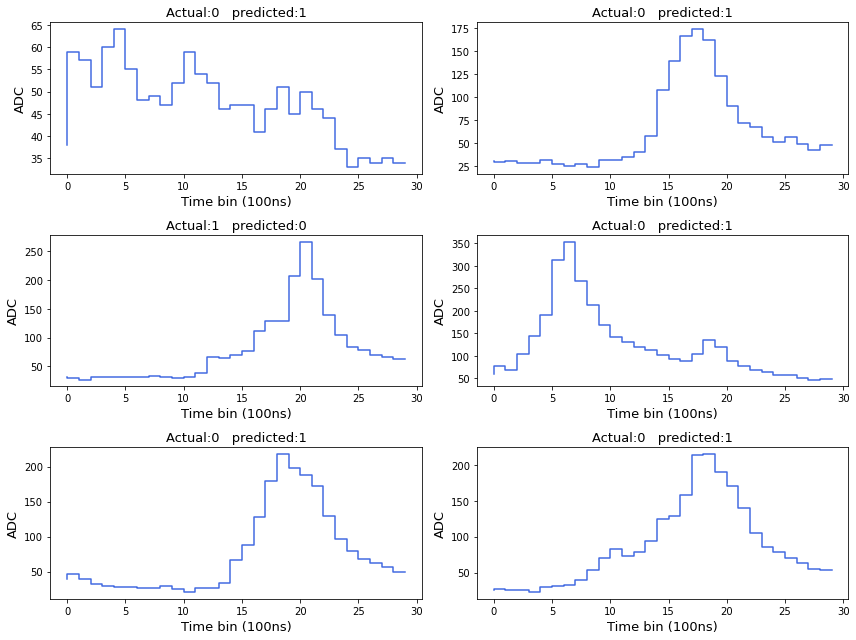

In [39]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[miscnn1[0][j+12]])
    plt.title("Actual:{}   predicted:{}".format(labels[miscnn1[0][j+12]], preds_cnn1[miscnn1[0][j+12]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

In [40]:
np.sum(signals[0], axis=0)

array([ 30,  29,  32,  29,  31,  29, 116, 602, 631, 363, 194, 136, 112,
       100,  94,  79,  76,  69,  63,  58,  57,  53,  51,  48,  47,  44,
        44,  43,  42,  41], dtype=int64)

##  Lets now check where the actual signal is sim but it is predicted to be real

In [41]:
mismatch = np.where(labels!=preds_cnn1)[0]

mismatch

array([    9,    22,    40, ..., 80024, 80121, 80212], dtype=int64)

In [42]:
tn = mismatch[labels[mismatch]==1]

In [43]:
tn[:7]

array([ 300,  322,  516,  880,  912,  995, 1180], dtype=int64)

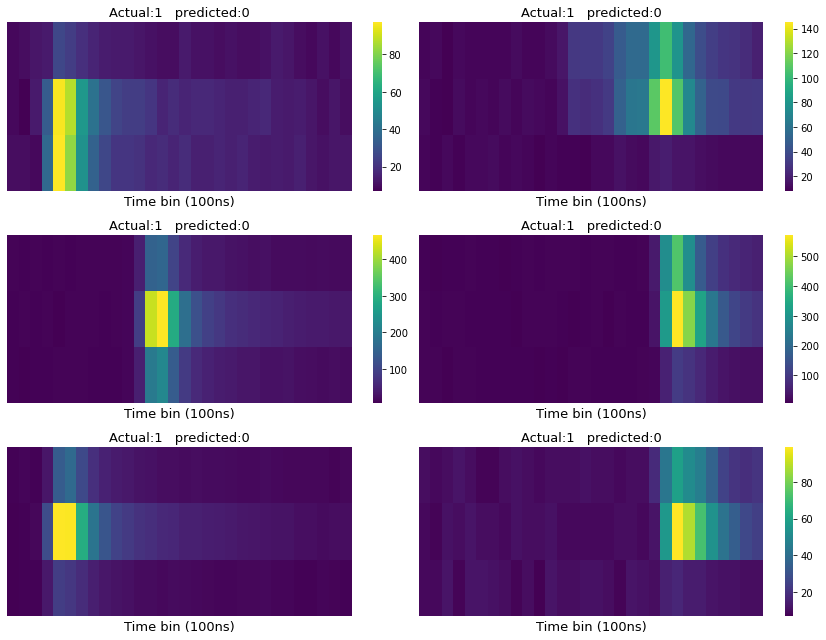

In [44]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[tn[j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[tn[j]], preds_cnn1[tn[j]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

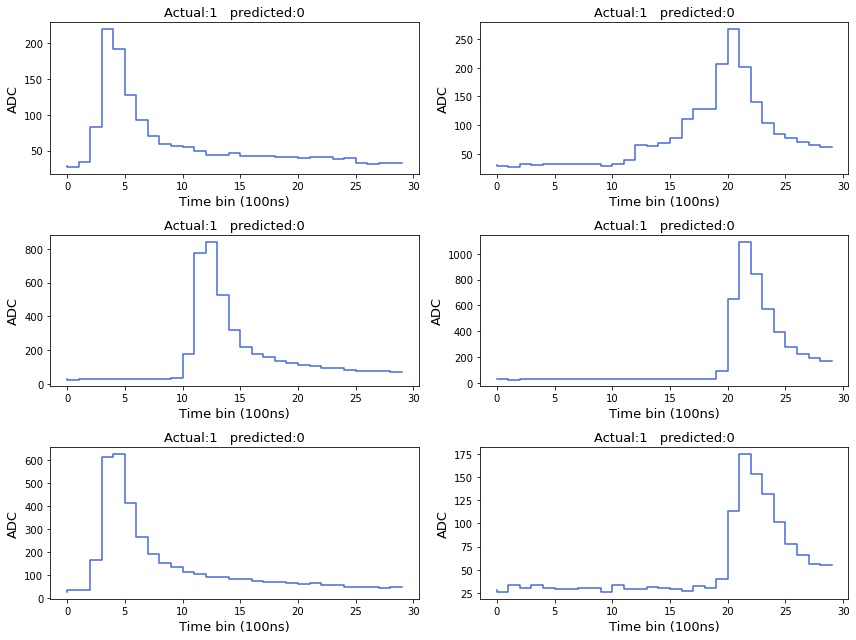

In [45]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[tn[j]])
    plt.title("Actual:{}   predicted:{}".format(labels[tn[j]], preds_cnn1[tn[j]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

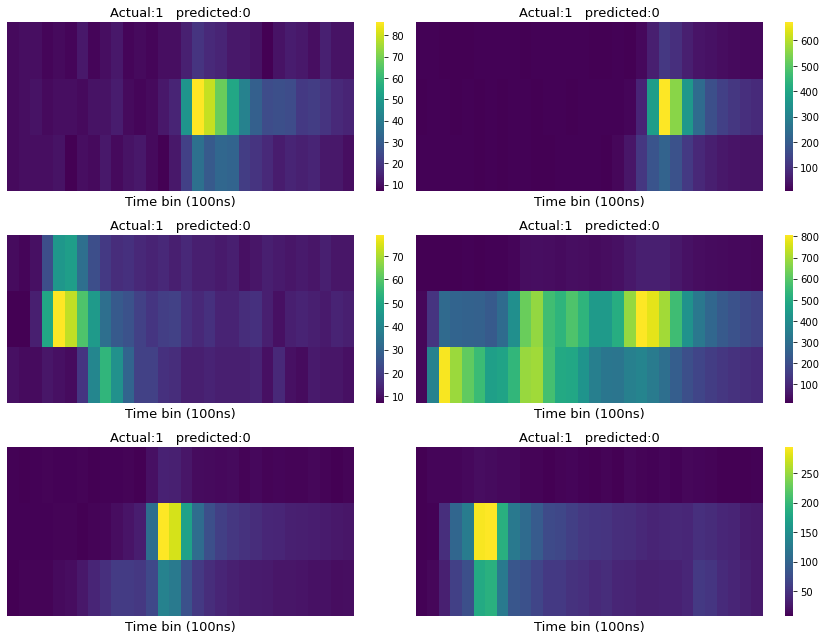

In [46]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[tn[j+6]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[tn[j+6]], preds_cnn1[tn[j+6]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

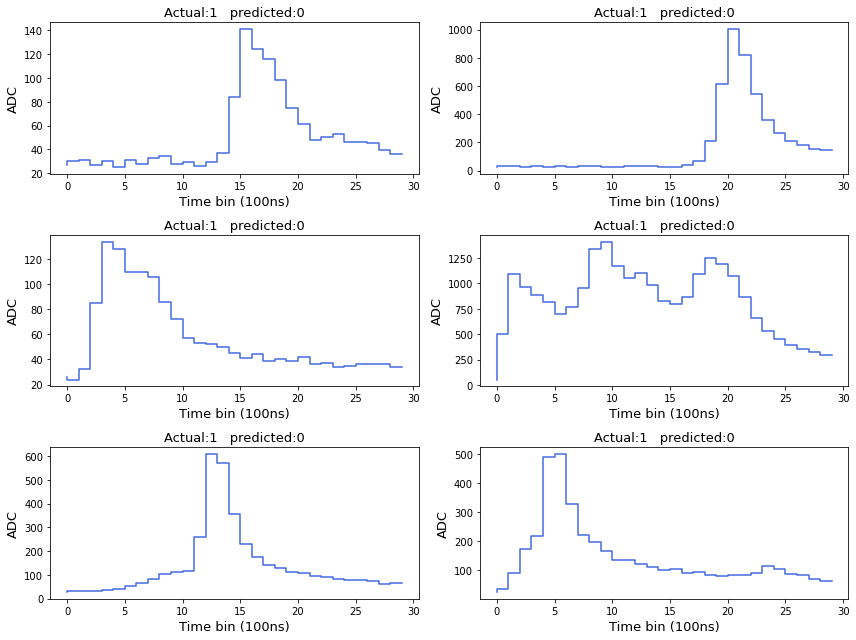

In [47]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[tn[j+6]])
    plt.title("Actual:{}   predicted:{}".format(labels[tn[j+6]], preds_cnn1[tn[j+6]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

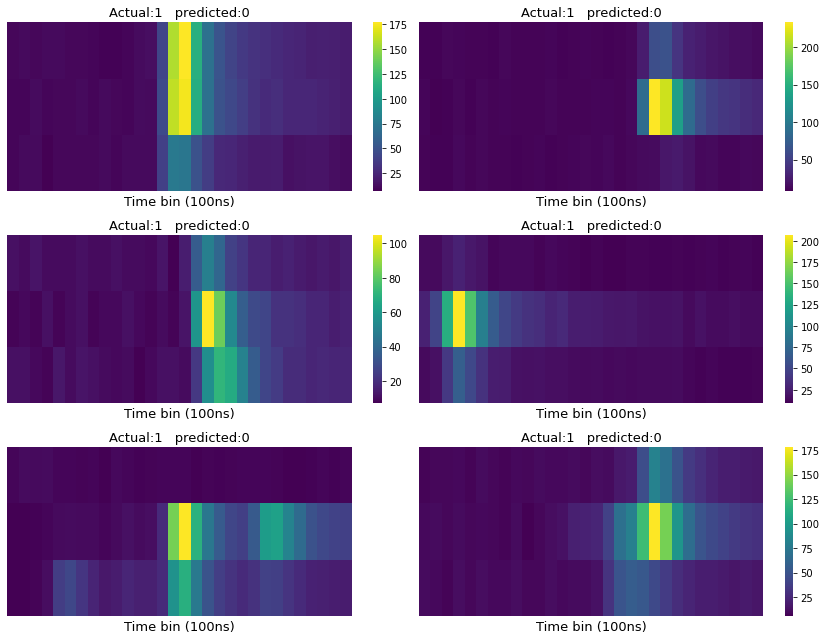

In [48]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[tn[j+12]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[tn[j+12]], preds_cnn1[tn[j+12]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

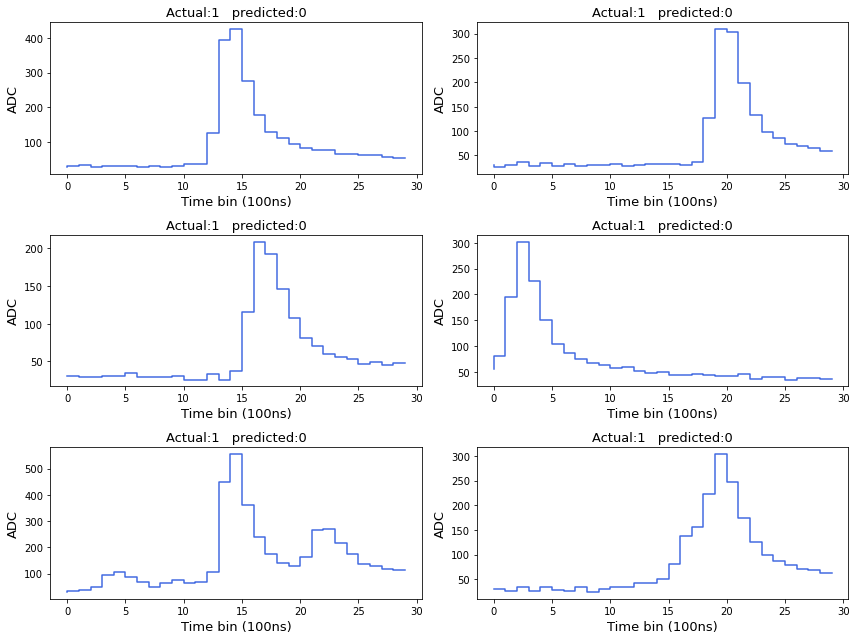

In [49]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[tn[j+12]])
    plt.title("Actual:{}   predicted:{}".format(labels[tn[j+12]], preds_cnn1[tn[j+12]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

# Lets get all the signals that are sim by classified as real -- they are valuable 

In [50]:
sigs_fn = signals[tn]

In [51]:
labels_tn = labels[tn]

In [52]:
#pd.DataFrame(signals[tn].reshape(-1, 1, 90))

In [53]:
## get correctly identified sigs 

cor = np.where(labels==preds_cnn1)[0]
cor

array([    0,     1,     2, ..., 80265, 80266, 80267], dtype=int64)

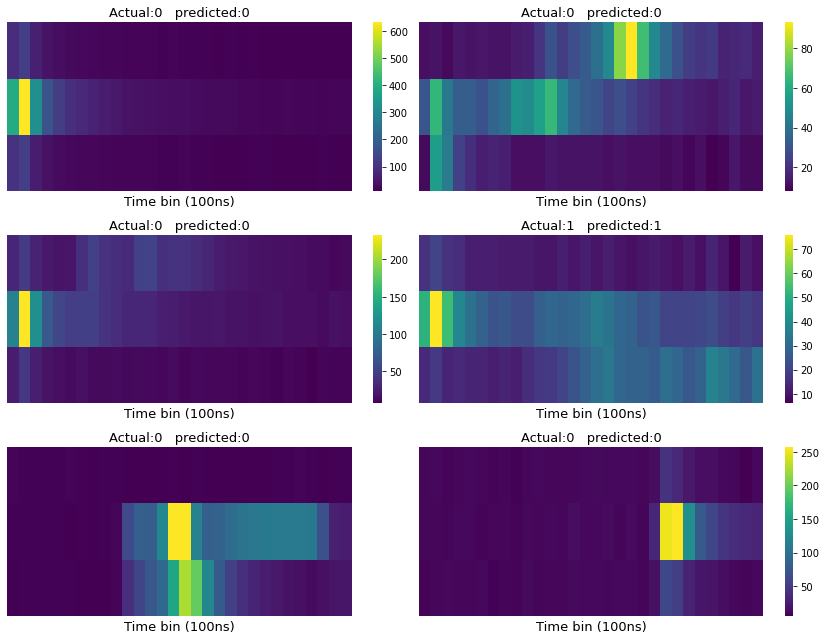

In [54]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[cor[j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[cor[j]], preds_cnn1[cor[j]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

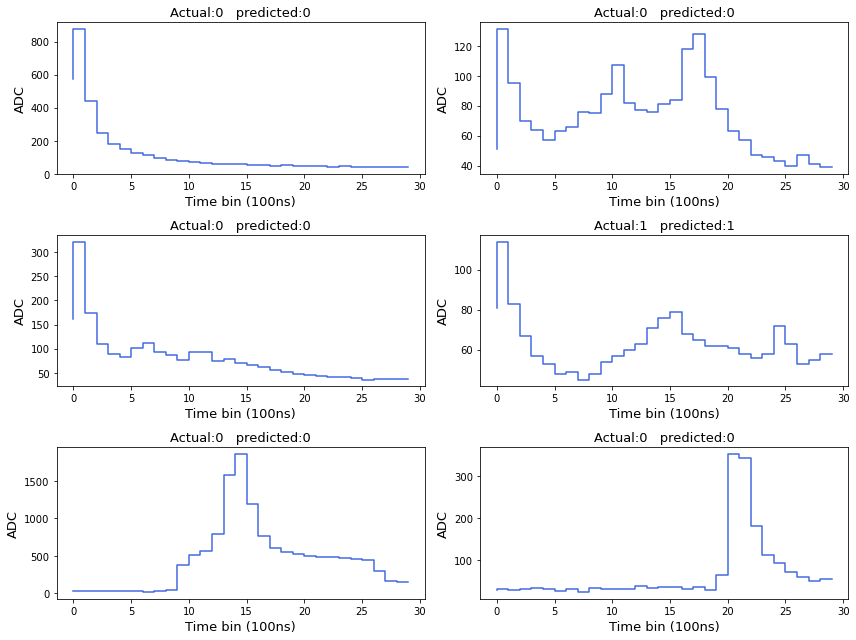

In [55]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[cor[j]])
    plt.title("Actual:{}   predicted:{}".format(labels[cor[j]], preds_cnn1[cor[j]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

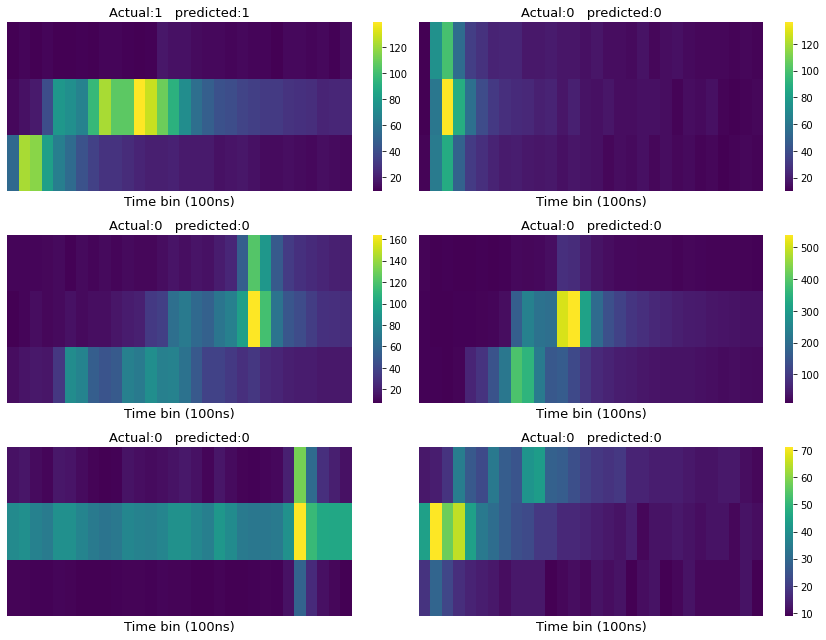

In [56]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[cor[j+12]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[cor[j+12]], preds_cnn1[cor[j+12]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

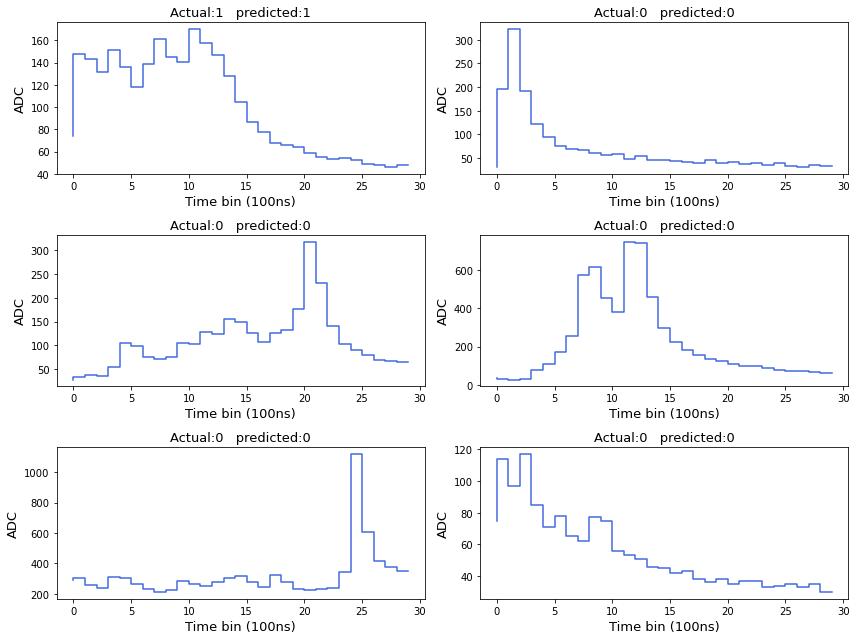

In [57]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[cor[j+12]])
    plt.title("Actual:{}   predicted:{}".format(labels[cor[j+12]], preds_cnn1[cor[j+12]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

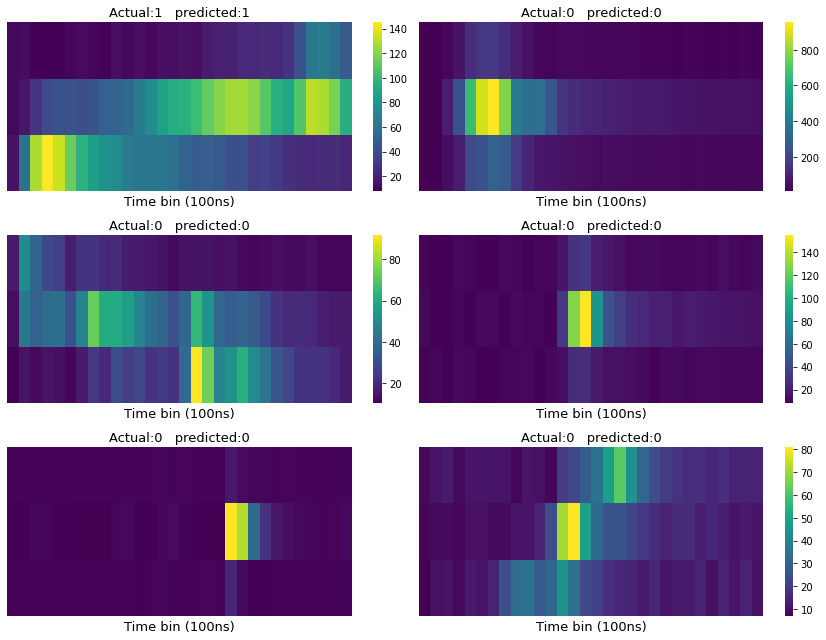

In [58]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    sns.heatmap(signals[cor[j+20]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    plt.title("Actual:{}   predicted:{}".format(labels[cor[j+20]], preds_cnn1[cor[j+20]]), fontsize=13)
    plt.xlabel("Time bin (100ns)", fontsize=13)
    plt.tight_layout()

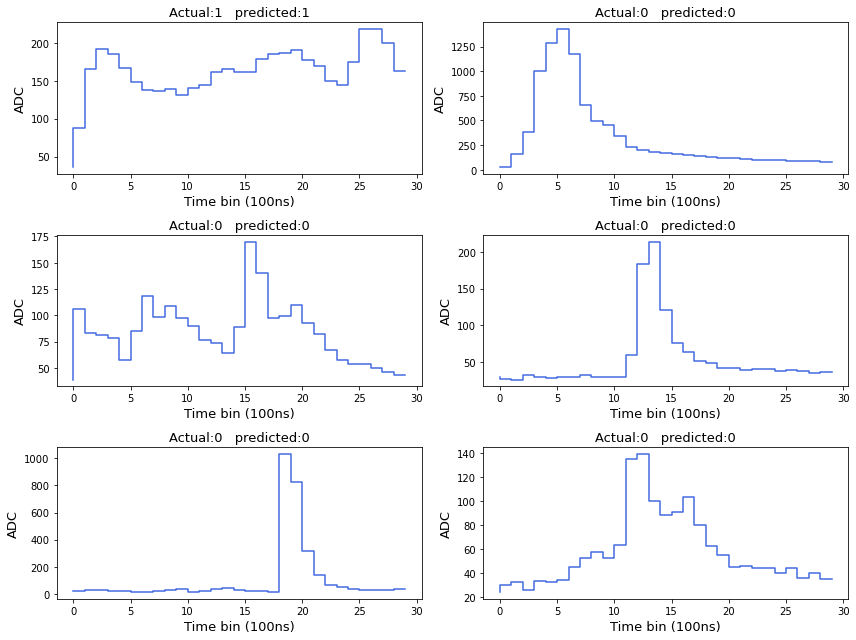

In [59]:
plt.figure(figsize=(12, 9))
for j in range(1,7):
    
    plt.subplot(3,2,j)
    #plt.figure(figsize=(10, 4))
    #sns.heatmap(signals[miscnn1[0][j]], cmap='viridis', xticklabels=False, yticklabels=False, cbar=True)
    #plt.title("\nTOTAL ADC SUM = {}\n".format(sdf1.ADCSUM[j+50]))
    single_ph(signals[cor[j+20]])
    plt.title("Actual:{}   predicted:{}".format(labels[cor[j+20]], preds_cnn1[cor[j+20]]), fontsize=13)
    #plt.xlabel("Time bin (100ns)", fontsize=13)
    #plt.tight_layout()
    #plt.show()

In [60]:
probs_cnn1[:10]

array([[9.9999988e-01, 1.3229177e-07],
       [1.0000000e+00, 8.2579685e-09],
       [9.9998796e-01, 1.2044126e-05],
       [1.0000000e+00, 7.5565066e-12],
       [7.1136252e-05, 9.9992883e-01],
       [1.0000000e+00, 1.2081622e-11],
       [9.9999988e-01, 1.6625118e-07],
       [1.5236451e-07, 9.9999988e-01],
       [1.0000000e+00, 1.7316069e-14],
       [2.0075957e-01, 7.9924035e-01]], dtype=float32)